# Proyek Analisis Data: Nama dataset

- Nama: Khabib Zuliansyah   
- Email: khabiblpu@gmail.com
- Id Dicoding: khabib_zuliansyah

## Menentukan Pertanyaan Bisnis

- Persebaran Pelanggan di setiap state
- Customer aktif di setiap state
- Barang yang paling banyak terjual
- Omset Barang tertinggi berdasarkan katogori barang
- Penjualan Barang tertinggi berdasarkan katogori barang
- Pembayaran yang paling sering dipakai
- Komparasi antara penjualan dan omset di setiap state

## Menyiapkan semua library yang dibutuhkan

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [93]:
customers_df = pd.read_csv("customers_dataset.csv", delimiter=",")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [94]:
geolocation_df = pd.read_csv("geolocation_dataset.csv", delimiter=",")
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [95]:
order_items_df = pd.read_csv("order_items_dataset.csv", delimiter=",")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [96]:
order_payments_df = pd.read_csv("order_payments_dataset.csv", delimiter=",")
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [97]:
order_reviews_df = pd.read_csv("order_reviews_dataset.csv", delimiter=",")
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [98]:
orders_df = pd.read_csv("orders_dataset.csv", delimiter=",")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [99]:
product_category_df = pd.read_csv("product_category_name_translation.csv", delimiter=",")
product_category_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [100]:
products_df = pd.read_csv("products_dataset.csv", delimiter=",")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [101]:
sellers_df = pd.read_csv("sellers_dataset.csv", delimiter=",")
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### Assessing Data

#### Customers Dataset

In [102]:
customers_df.isnull().sum()
customers_df.duplicated().sum()
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


#### Geolocation Dataset

In [103]:
geolocation_df.isnull().sum()
geolocation_df.duplicated().sum()
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


#### Order Items Dataset

In [104]:
order_items_df.info()
order_items_df.isnull().sum()
order_items_df.duplicated().sum()
order_items_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


#### Order Payment Dataset

In [105]:
order_payments_df.head()
order_payments_df.info()
order_payments_df.isnull().sum()
order_payments_df.duplicated().sum()
order_payments_df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


#### Order Reviews Dataset

In [106]:
order_reviews_df.head()
order_reviews_df.info()
order_reviews_df.isnull().sum()
order_reviews_df.duplicated().sum()
order_reviews_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


#### Orders Dataset

In [107]:
orders_df.head()
orders_df.info()
orders_df.isnull().sum()
orders_df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


0

#### Product Category Name Translation

In [108]:
product_category_df.head()
product_category_df.info()
product_category_df.isnull().sum()
product_category_df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


0

#### Product Dataset

In [109]:
products_df.head()
products_df.info()
products_df.isnull().sum() # Null product_category_name, product_name_lenght, product_description_lenght
products_df.duplicated().sum()
products_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


#### Sellers Dataset

In [110]:
sellers_df.head()
sellers_df.info()
sellers_df.isnull().sum()
sellers_df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


0

### Cleaning Data

#### Cleaning Geolocation Dataset

In [111]:
geolocation_df.duplicated()
#geolocation_df.drop_duplicates(inplace=True)
#geolocation_df.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
1000158    False
1000159     True
1000160     True
1000161    False
1000162     True
Length: 1000163, dtype: bool

#### Cleaning Orders Items Dataset

In [112]:
order_items_df.head()
order_items_df['shipping_limit_date']=pd.to_datetime(order_items_df['shipping_limit_date'])
order_items_df.info()
order_items_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


#### Order Reviews Dataset

In [113]:
order_reviews_df.info()
datetime_columns = ['review_creation_date','review_answer_timestamp']
for column in datetime_columns:
    order_reviews_df[column]=pd.to_datetime(order_reviews_df[column])
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_s

#### Orders Dataset

In [114]:
orders_df.info()
orders_df.dropna(inplace=True)
orders_df.isnull().sum()
datetime_columns = ['order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date']
for column in datetime_columns:
    orders_df[column]=pd.to_datetime(orders_df[column])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


#### Product Dataset

In [115]:
products_df.isna().sum()
products_df.head()
products_df.dropna(inplace=True)
products_df.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

## Exploratoty Data Analysis (EDA)

In [116]:
customer_id_in_orders_df = orders_df.customer_id.tolist()
customers_df['status'] = customers_df['customer_id'].apply(lambda x: 'Active' if x in customer_id_in_orders_df else 'Non Active')

In [117]:
orders_all_df= pd.merge(
    left = orders_df,
    right = order_items_df,
    how='left',
    left_on='order_id',
    right_on='order_id'
)
orders_all_df
orders_all_df= pd.merge(
    left = orders_all_df,
    right = customers_df,
    how='left',
    left_on='customer_id',
    right_on='customer_id'
)
orders_all_df= pd.merge(
    left = orders_all_df,
    right = sellers_df,
    how='left',
    left_on='seller_id',
    right_on='seller_id'
)
orders_all_df= pd.merge(
    left = orders_all_df,
    right = order_payments_df,
    how='left',
    left_on='order_id',
    right_on='order_id'
)
product_all_df= pd.merge(
    left = products_df,
    right = product_category_df,
    how='left',
    left_on='product_category_name',
    right_on='product_category_name'
)
all_df = pd.merge(
    left = orders_all_df,
    right = product_all_df,
    how='left',
    left_on='product_id',
    right_on='product_id'
)

### Explore Customer Aktif berdasarkan state

In [118]:

all_df[all_df['status']=='Active'].groupby(by='customer_state').customer_id.nunique().sort_values(ascending=False)

customer_state
SP    40489
RJ    12351
MG    11352
RS     5342
PR     4923
SC     3547
BA     3256
DF     2080
ES     1995
GO     1957
PE     1593
CE     1278
PA      946
MT      886
MA      716
MS      701
PB      517
PI      476
RN      474
AL      397
SE      335
TO      274
RO      243
AM      145
AC       80
AP       67
RR       41
Name: customer_id, dtype: int64

### Penjualan Batang berdasarkan kategori dan Pemjualan Berdasarkan Kategori

In [119]:
# Total Barang Terjual
all_df.groupby(by='product_category_name_english').agg({
    'order_id':'nunique',
    'price':'sum'

}).sort_values(by='order_id',ascending=False)


,order_id,price
product_category_name_english,,
bed_bath_table,9271,1077834.14
health_beauty,8649,1271548.15
sports_leisure,7528,990417.74
computers_accessories,6529,918837.87
furniture_decor,6303,745748.80
...,...,...
arts_and_craftmanship,23,1814.01
la_cuisine,13,2303.98
cds_dvds_musicals,12,730.00


### Omset Barang Berdasarkan kategori product

In [120]:
# Total Omset Barang
all_df.groupby(by='product_category_name_english').agg({
    'order_id':'nunique',
    'price':'sum'

}).sort_values(by='order_id',ascending=False)


,order_id,price
product_category_name_english,,
bed_bath_table,9271,1077834.14
health_beauty,8649,1271548.15
sports_leisure,7528,990417.74
computers_accessories,6529,918837.87
furniture_decor,6303,745748.80
...,...,...
arts_and_craftmanship,23,1814.01
la_cuisine,13,2303.98
cds_dvds_musicals,12,730.00


### Exlpore Seller Omset 

In [121]:
all_df.groupby(by='seller_id').agg({
    'order_id':'nunique',
    'price':'sum'

}).sort_values(by='order_id',ascending=False)


,order_id,price
seller_id,,
6560211a19b47992c3666cc44a7e94c0,1819,125887.82
4a3ca9315b744ce9f8e9374361493884,1772,209618.87
cc419e0650a3c5ba77189a1882b7556a,1651,105157.28
1f50f920176fa81dab994f9023523100,1399,111102.41
da8622b14eb17ae2831f4ac5b9dab84a,1311,168398.37
...,...,...
a7c53f6b3b61adbdaa99dda97e8cbd56,1,198.00
d93b8458c6fe139d85cfa5eadbf55bd2,1,19.90
265fdc289dffa9f1ad801c74f7d0de47,1,495.00


### Jenins Payment yang tertinggi

In [122]:
all_df.groupby(by='payment_type').agg({
    'payment_sequential':'sum'
})

,payment_sequential
payment_type,
boleto,22348.0
credit_card,85261.0
debit_card,1707.0
voucher,16134.0


In [123]:

all_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115021 entries, 0 to 115020
Data columns (total 35 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       115021 non-null  object        
 1   customer_id                    115021 non-null  object        
 2   order_status                   115021 non-null  object        
 3   order_purchase_timestamp       115021 non-null  object        
 4   order_approved_at              115021 non-null  object        
 5   order_delivered_carrier_date   115021 non-null  datetime64[ns]
 6   order_delivered_customer_date  115021 non-null  datetime64[ns]
 7   order_estimated_delivery_date  115021 non-null  datetime64[ns]
 8   order_item_id                  115021 non-null  int64         
 9   product_id                     115021 non-null  object        
 10  seller_id                      115021 non-null  object        
 11  

### Order Items dan price Berdasarkan state

In [124]:

all_df.groupby(by=['customer_state','product_category_name']).agg({
    'order_item_id':'sum',
    'price':'sum'
}).sort_values(by='order_item_id',ascending=False)

all_df.groupby(by=['customer_state']).agg({
    'order_item_id':'sum',
    'price':'sum'
}).sort_values(by='order_item_id',ascending=False)

,order_item_id,price
customer_state,,
SP,58549,5306127.04
RJ,17619,1845534.63
MG,15842,1606073.62
RS,7693,765322.19
PR,7111,688718.43
SC,5128,523849.24
BA,4598,520942.37
GO,3168,297983.08
DF,2827,306949.63


In [125]:
all_df.groupby(by='product_category_name_english').agg({
    'order_id':'nunique',
    'price':'sum'

}).sort_values(by='order_id',ascending=False)

,order_id,price
product_category_name_english,,
bed_bath_table,9271,1077834.14
health_beauty,8649,1271548.15
sports_leisure,7528,990417.74
computers_accessories,6529,918837.87
furniture_decor,6303,745748.80
...,...,...
arts_and_craftmanship,23,1814.01
la_cuisine,13,2303.98
cds_dvds_musicals,12,730.00


## Visualization & Explanatory Analysis

### Jumlah Pelanggan Berdasarkan Negara Bagian

C:\Users\Zuliansyah\AppData\Local\Temp\ipykernel_3584\3455672060.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='customer_id', y='customer_state', data=all_df[all_df['status']=='Active'].groupby(by='customer_state').customer_id.nunique().sort_values(ascending=False).reset_index().head(10), palette='viridis')


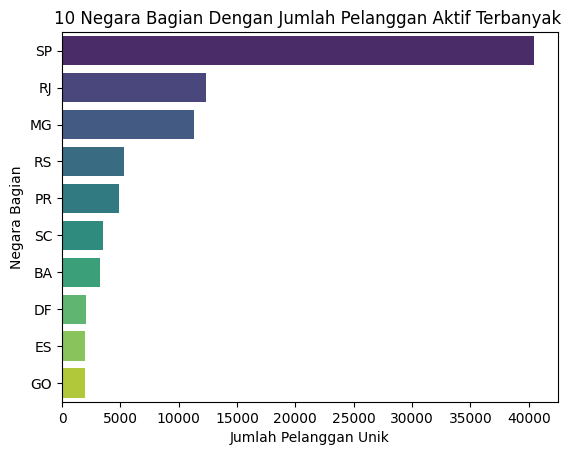

In [132]:
sns.barplot(x='customer_id', y='customer_state', data=all_df[all_df['status']=='Active'].groupby(by='customer_state').customer_id.nunique().sort_values(ascending=False).reset_index().head(10), palette='viridis')
plt.title('10 Negara Bagian Dengan Jumlah Pelanggan Aktif Terbanyak ')
plt.xlabel('Jumlah Pelanggan Unik')
plt.ylabel('Negara Bagian')
plt.show()

### Produk Dengan Jumlah Penjualan Tertinggi

C:\Users\Zuliansyah\AppData\Local\Temp\ipykernel_3584\1973131454.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='order_id', y='product_category_name_english', data=grouped_data, palette='viridis')


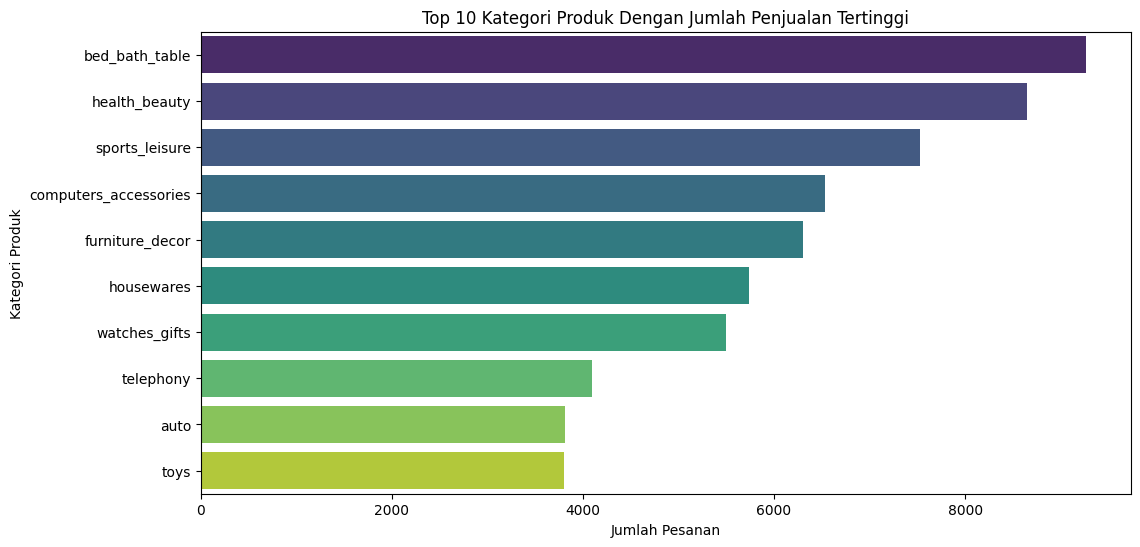

In [133]:
grouped_data=all_df.groupby(by='product_category_name_english').agg({
    'order_id':'nunique'
}).sort_values(by='order_id', ascending=False).head(10).reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='order_id', y='product_category_name_english', data=grouped_data, palette='viridis')
plt.title('Top 10 Kategori Produk Dengan Jumlah Penjualan Tertinggi')
plt.xlabel('Jumlah Pesanan')
plt.ylabel('Kategori Produk')
plt.show()

### Kategori barang dengan Omset penjualan tertinggi

C:\Users\Zuliansyah\AppData\Local\Temp\ipykernel_3584\4249512093.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='price', y='product_category_name_english', data=grouped_data, palette='viridis')


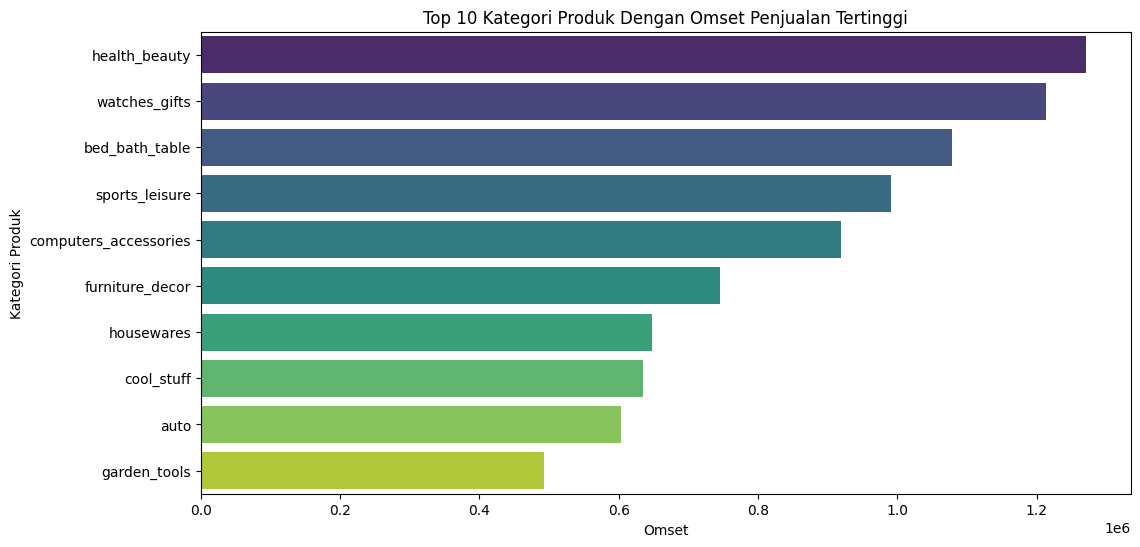

In [134]:
grouped_data = all_df.groupby(by='product_category_name_english').agg({
    'order_id': 'nunique',
    'price': 'sum'
}).sort_values(by='price', ascending=False).head(10).reset_index()

# Visualisasi dengan seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='price', y='product_category_name_english', data=grouped_data, palette='viridis')
plt.title('Top 10 Kategori Produk Dengan Omset Penjualan Tertinggi')
plt.xlabel('Omset')
plt.ylabel('Kategori Produk')
plt.show()

### Toko dengan Penjualan Tertinggi

C:\Users\Zuliansyah\AppData\Local\Temp\ipykernel_3584\1679068789.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='order_id', y='seller_id', data=grouped_data, palette='viridis')


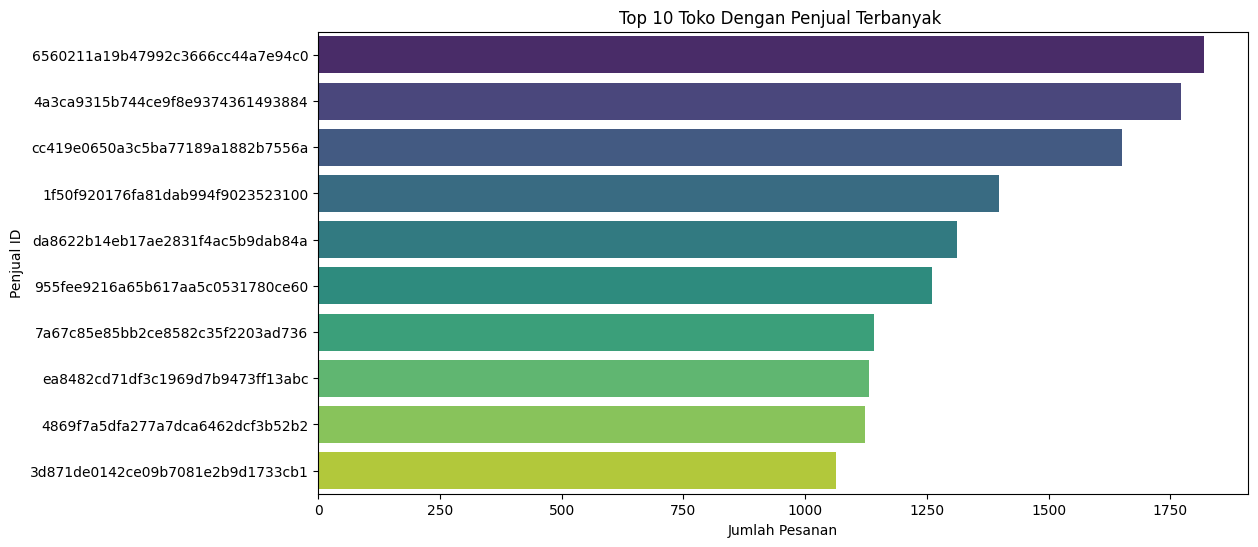

In [135]:
grouped_data = all_df.groupby(by='seller_id').agg({
    'order_id': 'nunique',
    'price': 'sum'
}).sort_values(by='order_id', ascending=False).head(10).reset_index()
grouped_data
# Visualisasi dengan seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='order_id', y='seller_id', data=grouped_data, palette='viridis')
plt.title('Top 10 Toko Dengan Penjual Terbanyak ')
plt.xlabel('Jumlah Pesanan')
plt.ylabel('Penjual ID')
plt.show()

### Pembayaran yang paling sering dipakai ?

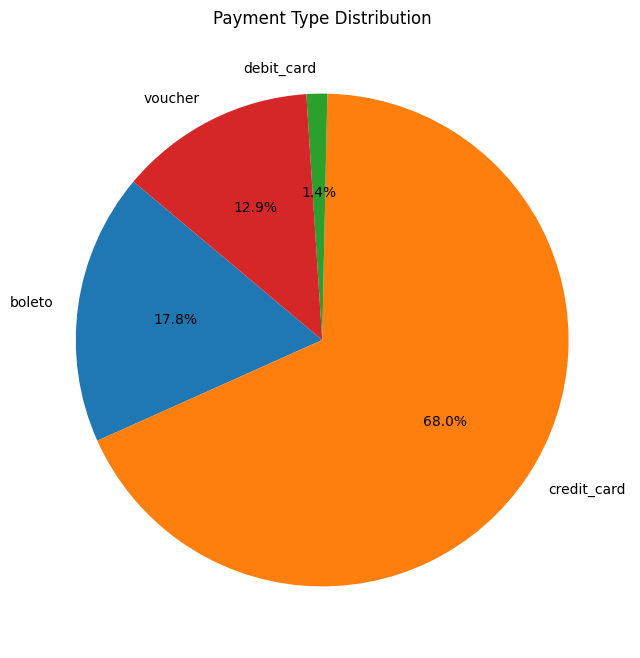

In [136]:
grouped_data = all_df.groupby(by='payment_type').agg({
    'payment_sequential': 'sum'
}).reset_index()

total_payments = grouped_data['payment_sequential'].sum()

# Menghitung persentase untuk setiap jenis pembayaran
grouped_data['percentage'] = (grouped_data['payment_sequential'] / total_payments) * 100

# Plotting diagram pie
plt.figure(figsize=(8, 8))
plt.pie(grouped_data['percentage'], labels=grouped_data['payment_type'], autopct='%1.1f%%', startangle=140)
plt.title('Payment Type Distribution')
plt.show()

### Perbandingan antara Penjualan dan Omset berdasarkan state ?

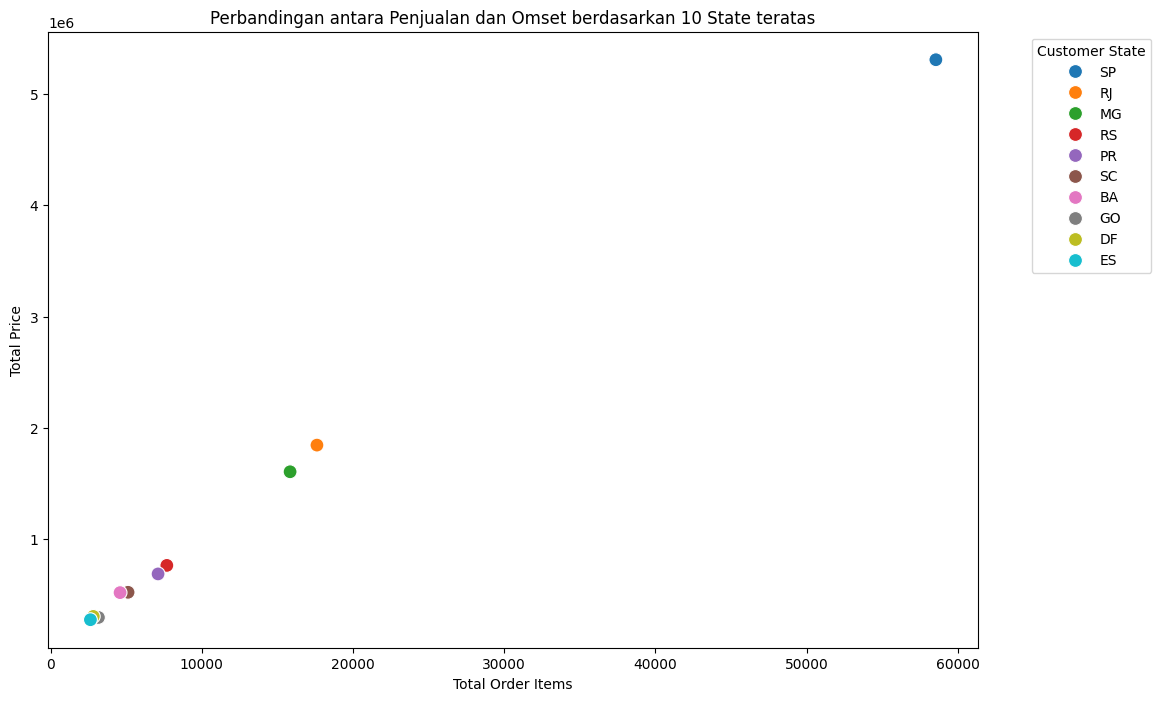

In [131]:
grouped_data = all_df.groupby(by=['customer_state']).agg({
    'order_item_id': 'sum',
    'price': 'sum'
}).sort_values(by='order_item_id', ascending=False).head(10)

# Reset index agar 'customer_state' menjadi kolom biasa
grouped_data = grouped_data.reset_index()

# Plotting scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(x='order_item_id', y='price', hue='customer_state', data=grouped_data, s=100)
plt.xlabel('Total Order Items')
plt.ylabel('Total Price')
plt.title('Perbandingan antara Penjualan dan Omset berdasarkan 10 State teratas')
plt.legend(title='Customer State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Conclusion

- Persebaran pelanggan aktif terbanyak ada di SP State
- Penjualan Produk dengan jumlah penjualan tertinggi di dominasi bed_bath_table disusul health_beauty
- Penjualan Produk dengan omset penjualan tertinggi di dominasi bed_bath_table disusul wacthes_gifts
- Toko dengan penjualan terbanyak 6560211a19b47992c3666cc44a7e94c0 dan disusul 4a3ca9315b744ce9f8e9374361493884
- Pembayarang yang mayoritas dipakai adalah credit_card
- State SP mendominasi penjualan terbanyak dan omset terbanyak